In [3]:
##For the data visualisation as centerd plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')#Applying warning filter that if warning comes then ignore
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns#For data visualisation

import pylab as plot

params = {
    'axes.labelsize' : "large",
    'xtick.labelsize': "x-large",
    'legend.fontsize': 21,
    'figure.dpi' : 150,
    'figure.figsize' : [25,7]
}
plot.rcParams.update(params)

#loading the training data set

data = pd.read_csv('/Users/adityamishra/data/train.csv')# . signifies the current directory
print(data.shape)


(891, 12)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### In Survived coumn if value is 0 means passenger died else survived.

1. Pclass: Passenger class
2. SibSp: number of siblings or spouse
3. Parch: number of parents and children traveling with the passenger
4. Embarked: Areas where passenger can accomodate, these are divided into three parts S,C,Q.

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Here we can see that 177 values are missing from the age column.

The solution to fill compensate those missing values is to fill in the values with the median age.
We can also represent it with the mean age but the median is better to outliers.

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].median())#fillna fills the NaN values with a given number with which we want to substitute
#Checking the result
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Here we can see that the value in AGE column is rectified

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


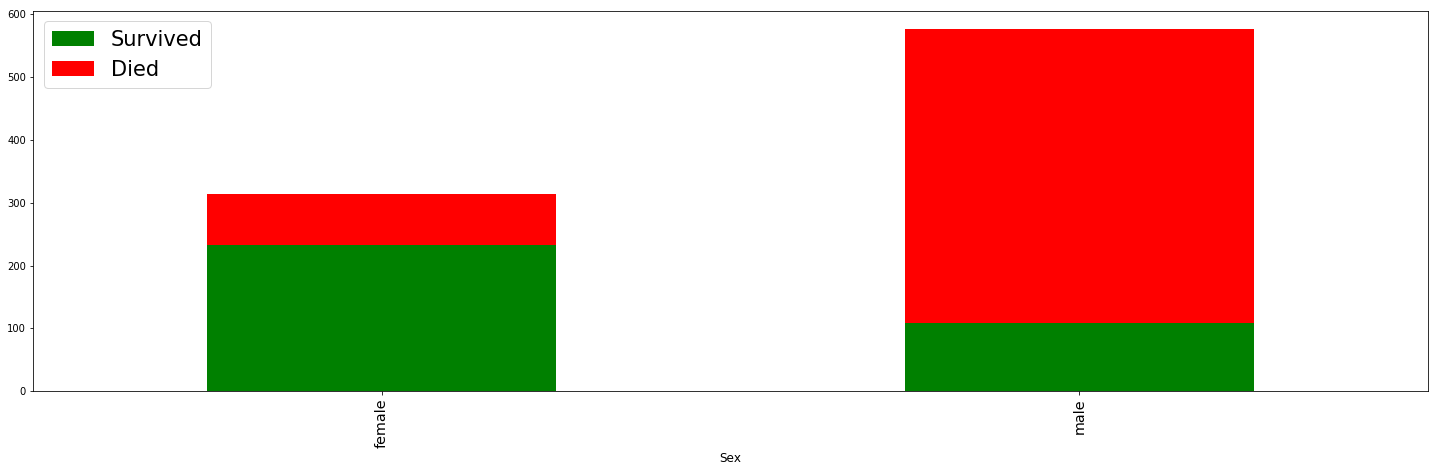

In [7]:
#By the simple formula of probablity we have read that P(Died) = 1-P(Survived), similarly
#taking note from the above formula
data['Died'] = 1 - data['Survived']

#Here we are grouping the dataframe and aggregating the sum of who survived and dies by
#based on the gender
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind = 'bar', figsize=(25,7),
                                                         stacked = True, colors=['g','r']);

#### Here, we can see that the males are most likely to die than women


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


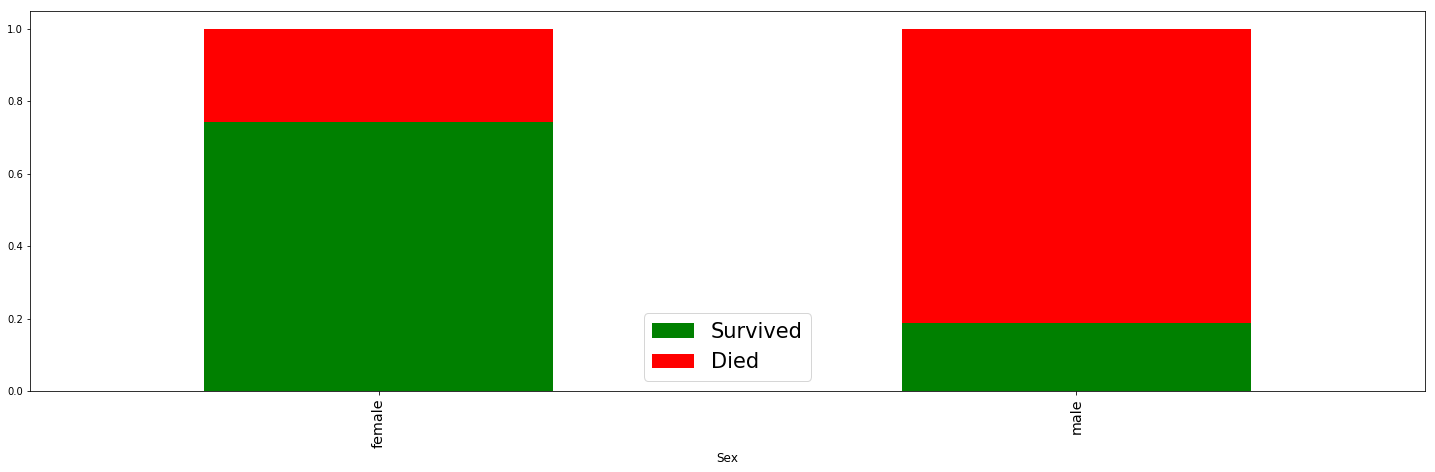

In [8]:
#Plotting the same graph with the ratio.
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25,7),
                                                          stacked = True, colors=['g','r']);

#### Here it's again visualised that women are most likely to survive as we remember the scene from the movie Titanic where it is said that "Women and Children first" so connecting the dots from that scene females survived more.

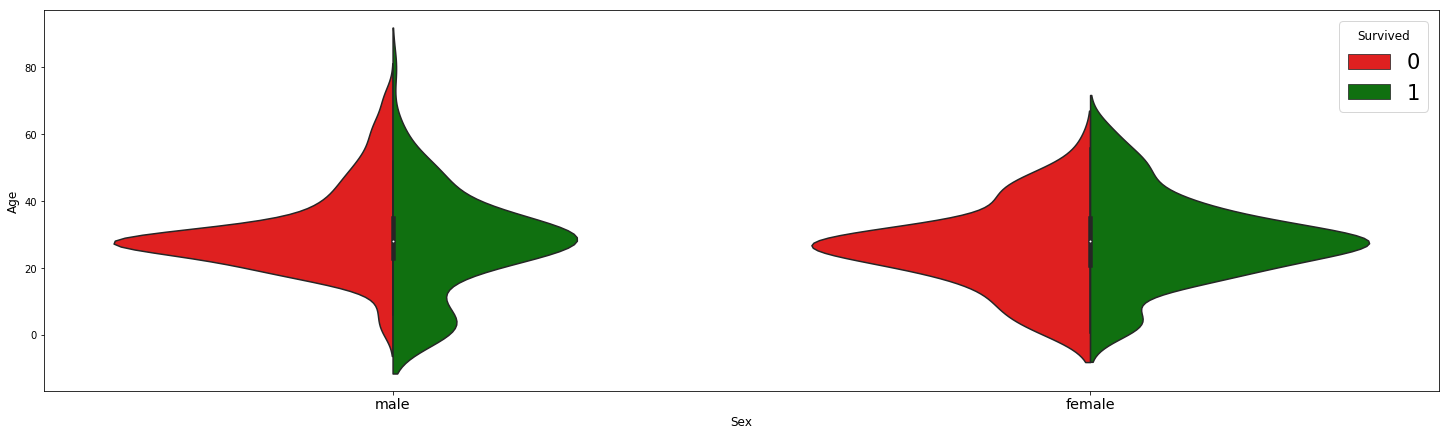

In [9]:
#correlating the survival with the age variable
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age',
              hue='Survived', data=data,
              split=True,
              palette={0:"r", 1:'g'});

1. Here we can see that men of young age survived more.
2. Male passenger from age 20 to 40 died more.
3. Age doesn't played much role in the survival of women.

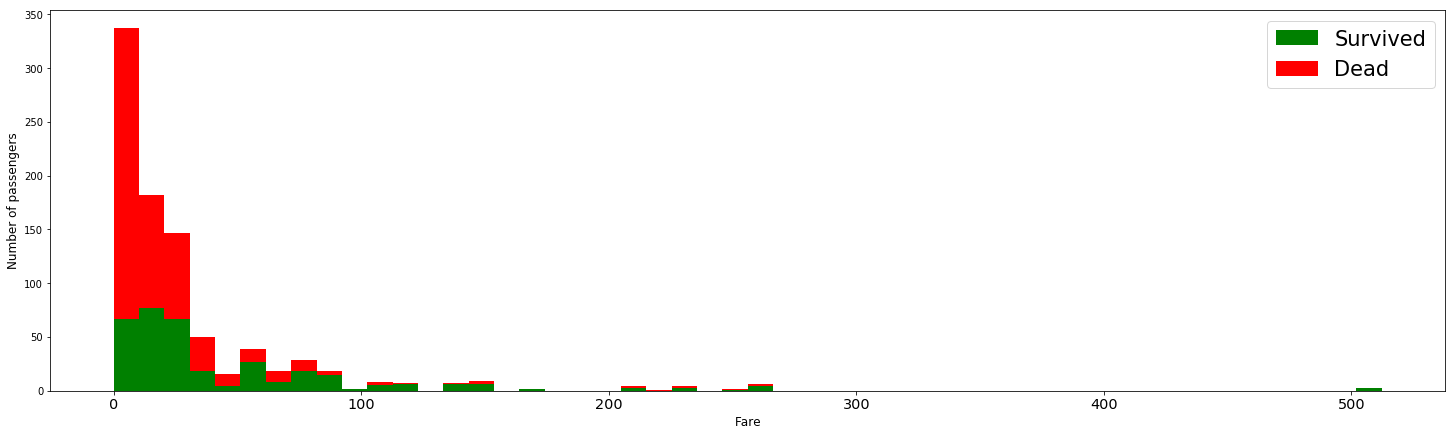

In [10]:
#Survival based on the ticket of the passenger
figure = plt.figure(figsize=(25,7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] ==0]['Fare']],
        stacked =True, color = ['g', 'r'],
        bins=50, label = ['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

#### Here, we can see that the passengers with cheap ticket price are more likely to die and the important socio-economic figures were rescured first.

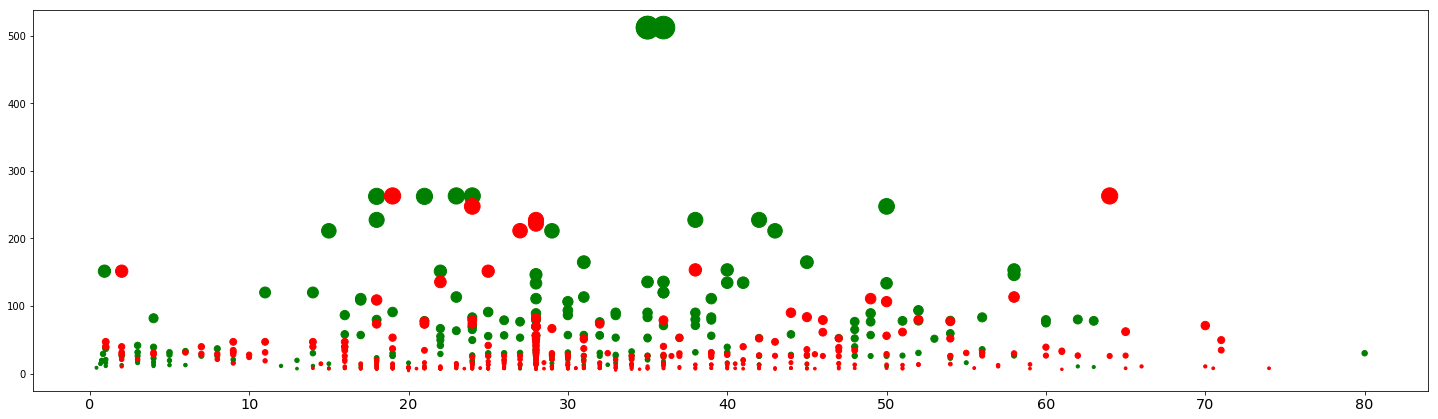

In [11]:
#Combining the fare, age and survival in the single chart
plt.figure(figsize=(25,7))
ax=plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'],
          c='green', s=data[data['Survived'] == 1] ['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'],
          c='red', s=data[data['Survived'] == 0] ['Fare']);

#### Here we can observe following things
1. Adults between age 20 to 45 which is represented on z axis were having largest ticket fares.
2. Small red dots between age 10 to 45 shows adults from lower classes on the boat
3. Small green dots from 0 to 7 on x axis shows theese are children that were saved.

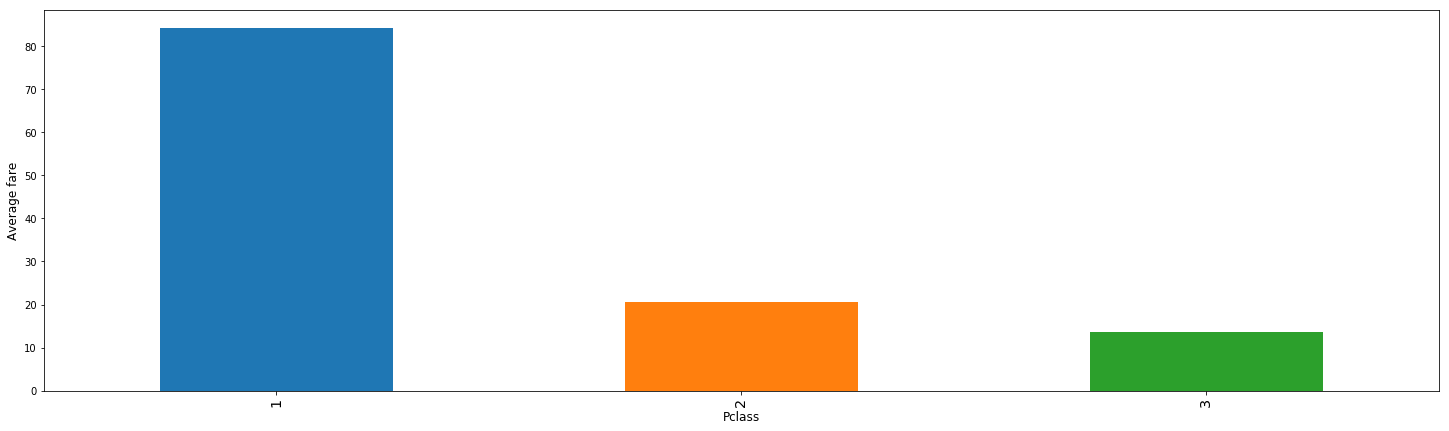

In [12]:
#Correlating the fare with the Passenger class that is 1st, 2nd and 3rd
ax = plot.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind = 'bar', figsize=(25,7), ax = ax);

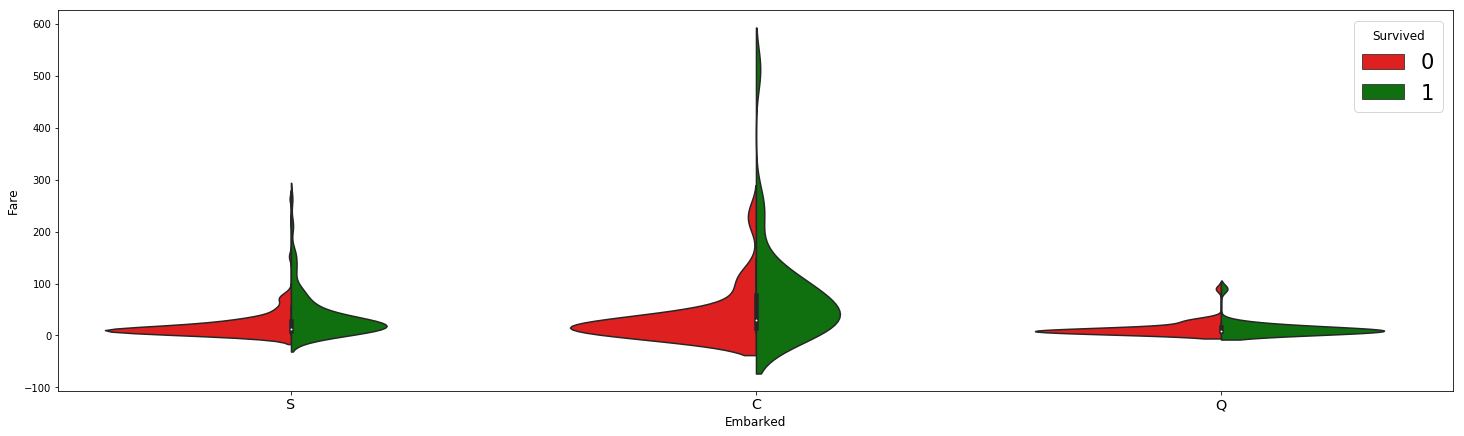

In [13]:
#Accommodation area effecting the survival
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data,
              split=True, palette={0:"r", 1:"g"});

#### Here we can observe following things
1. In class C, passengers who payed higher price survived.
2. Less people died in Q class

# Feature Engineering

Here in this part, we will learn how to process and transform these variables in such a way the data can be easily manageable by a ML algorithm.

In [14]:
#printing a function that states where a feature has been processed or not
def status(feature):
    print('Processing', feature, ' :ok')

### Loading the data

The trick while starting a ML problem is to append the training set to the test set together.
Here, we will build new features using the train set to prevent from information leakage.
After that the next step will be to add these variables to the test set.


In [15]:
#Loading the train and test sets and appending them together
def get_combined_data():
    #reading train data
    train = pd.read_csv('/Users/adityamishra/data/train.csv')
    
    #reading test data
    test = pd.read_csv('/Users/adityamishra/data/test.csv')
    
    #extracting and then removing the targets from the training data
    targets = train.Survived
    train.drop(['Survived'], 1, inplace = True)
    #Here in train.drop() we remove rows or columns by specifying label names and corresponding names
    #or by specifying directly index or column names.
    #inplace take default value as false and if True then do operation and return None
    
    #Here, we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop(['index', 'PassengerId'], inplace = True, axis=1)
    
    return combined

In [16]:
combined = get_combined_data()
print(combined.shape)

(1309, 10)


#### Here, we can see that train and test sets are combined

The total number of rows(1309) is the exact summation of the number of rows in the train set and the test set

In [17]:
combined.head()#Returning the 5 default rows

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting the passenger titles

Here we will extract the title of the passengers in the ship like Master, Sir or Dona.
Here we may introduce an additional information about the social status by simply parsing the name and extracting the title and converting to a binary variable.

In [18]:
#Different titles in the train set
titles = set()
for name in data['Name']:
    titles.add(name.split(', ')[1].split('.')[0].strip())
    

In [19]:
print(titles)

{'Mme', 'Capt', 'Miss', 'Major', 'the Countess', 'Rev', 'Master', 'Dr', 'Don', 'Mlle', 'Col', 'Sir', 'Lady', 'Jonkheer', 'Mrs', 'Mr', 'Ms'}


In [20]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    #Extracting the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(', ')[1].split('. ')[0].strip())
    
    #a map of more aggregated title and we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined
    

#### Here function get_titles extracts the titles from the name. Then, it maps the titles to categories of titles. We selected:
1. Officer
2. Royalty
3. Mr
4. Mrs
5. Miss
6. Master


In [21]:
combined = get_titles()

Processing Title  :ok


In [22]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
combined[combined['Title'].isnull()]#Cehcking if the titles have been filled correctly

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


#### There is indeed a NaN value in the line 1305. 

#### Processing the ages

In the 1st part the Age column was missing 177 values. There we replaced the values with the median age but it can't be the best solution since the age may differ by the gender or categories of passengers.
To avoid data leakage from the test set, we fill in missing ages in the train using the train set and we fill in ages im the test set using values calculated from the train set as well.

In [24]:
#Number of missing ages in train set
print (combined.iloc[:891].Age.isnull().sum())#Here by this syntax we are doing data selection
                                            #where iloc is used to do the selection row wise

177


In [25]:
#Numbers of missing ages in the test set
print (combined.iloc[891:].Age.isnull().sum())

86


In [26]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [27]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


#### This dataframe will help us represent missing age values based on different criteria.
#### Here we can see that the median age value can be different based on the Sex, Pclass and Title put together

For example:
1. If the passenger is female, from Pclass 1 and from Royalty then the median age is 40.5
2. If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.

In [30]:
#Creating a function that fills in the missing age in combined based on these different attributes.
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

    

In [31]:
combined = process_age()

Processing age  :ok


#### Now, we can see that the missing ages have been replaced.

In [33]:
#Processing names
def process_names():
    global combined
    #cleaning the name variable
    combined.drop('Name', axis=1, inplace = True)
    
    #encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    #removing the title variable
    combined.drop('Title', axis=1, inplace = True)
    
    status('names')
    return combined
#here we dropped the NAME column since wr won't be using it anymore because we created a title column

#Then we encoded the title values using dummy encoding by using pands.get_dummies
#By this we can convert the categorical value into the dummy/indicator variables


In [34]:
combined = process_names()

Processing names  :ok


In [35]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


#### Here we can see that
1. There is no longer a name feature
2. New variables (Ttile_X) appeared. These features are binary

## Processing Fare

In [36]:
##Processing the missing fare value by the average fare computed on the train set
def process_fares():
    global combined
    #There is one missing fare value and we are replacing it with the mean
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace = True)
    status('fare')
    return combined


In [37]:
#The above function simply replaces one missing Fare value by the mean
combined = process_fares()

Processing fare  :ok


## Processing embarked

In [38]:
def process_embarked():
    global combined
    #Two missing embarked values, we will filling them with the most frequent one in the train set(S)
    combined.Embarked.fillna('S', inplace = True)
    #dummy encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace = True)
    status('embarked')
    return combined

In [ ]:
#above function replaces the two missing values of Embarked 